# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import random
from IPython.display import Image
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import networkx as nx
from networkx.algorithms import community
# Node2Vec

# Load All Data

In [4]:
# Load the adjacency matrix into a numpy array.
ad_mat = np.loadtxt('AD.txt', dtype=int)
for i in range(0,70):
        ad_mat[i][i] = 0
G_AD = nx.from_numpy_matrix(ad_mat)
print("Number Of Edges: ",len(G_AD.edges()))
print("Number Of Nodes: ",len(G_AD.nodes()))

Number Of Edges:  1364
Number Of Nodes:  70


In [5]:
#plt.figure(figsize=(60,60))
#nx.draw(G_AD)

In [6]:
emci_mat = np.loadtxt('eMCI.txt', dtype=int)
#removing self loops
for i in range(0,70):
        emci_mat[i][i] = 0
G_eMCI = nx.from_numpy_matrix(emci_mat)
print("Number Of Edges: ",len(G_eMCI.edges()))
print("Number Of Nodes: ",len(G_eMCI.nodes()))

Number Of Edges:  1510
Number Of Nodes:  70


In [7]:
lmci_mat = np.loadtxt('lMCI.txt', dtype=int)
#removing self loops
for i in range(0,70):
        lmci_mat[i][i] = 0
G_eMCI = nx.from_numpy_matrix(emci_mat)
G_lMCI = nx.from_numpy_matrix(lmci_mat)
print("Number Of Edges: ",len(G_lMCI.edges()))
print("Number Of Nodes: ",len(G_lMCI.nodes()))

Number Of Edges:  1380
Number Of Nodes:  70


In [8]:
normal_mat = np.loadtxt('Normal.txt', dtype=int)
#removing self loops
for i in range(0,70):
        normal_mat[i][i] = 0
G_eMCI = nx.from_numpy_matrix(emci_mat)
G_Normal = nx.from_numpy_matrix(normal_mat)
print("Number Of Edges: ",len(G_Normal.edges()))
print("Number Of Nodes: ",len(G_Normal.nodes()))

Number Of Edges:  1490
Number Of Nodes:  70


In [9]:
#plt.figure(figsize=(60,60))
#nx.draw(G_eMCI)

In [10]:
#plt.figure(figsize=(60,60))
#nx.draw(G_lMCI)

In [11]:
#plt.figure(figsize=(60,60))
#nx.draw(G_Normal)

In [12]:
#utility function to get removed edges
def removedEdges(first,second):
    removed = 0
    for edge in first:
        if edge not in second:
            removed+=1
    return removed
#utility function to get added adges
def addedEdges(first,second):
    added = 0
    for edge in second:
        if edge not in first:
            added+=1
    return added

# Algorithm to be used

# ADAMIC ADAR

In [92]:
def linkPredictWithAdamic(first,second):
    #loading matrix of first state
    normal_mat = np.loadtxt(first, dtype=int)
    #removing self loops
    for i in range(0,70):
            normal_mat[i][i] = 0
    #bilding graphs
    G_Normal = nx.from_numpy_matrix(normal_mat)
    print("Number Of Edges: ",len(G_Normal.edges()))
    print("Number Of Nodes: ",len(G_Normal.nodes()))
    #loading matrix of second state
    emci_mat = np.loadtxt(second, dtype=int)
    #removing self loops
    for i in range(0,70):
        emci_mat[i][i] = 0
    #building graph of second state
    G_eMCI = nx.from_numpy_matrix(emci_mat)
    #G_lMCI = nx.from_numpy_matrix(lmci_mat)
    print("Number Of Edges: ",len(G_eMCI.edges()))
    print("Number Of Nodes: ",len(G_eMCI.nodes()))
    print("Number Of Removed Edges: ",removedEdges(G_Normal.edges(),G_eMCI.edges()))
    print("Number of new Edges:",addedEdges(G_Normal.edges(),G_eMCI.edges()))
    #print(emci_mat)
    #print(type(emci_mat))
    ecmi_pred = emci_mat.copy()
    #prepare the positive score matrix
    pred_adamic = list(nx.adamic_adar_index(G_Normal))
    positive_score_mat = np.zeros((70,70))
    for item in pred_adamic:
        positive_score_mat[item[0]][item[1]] = item[2]

    #preparing negative score matrix
    G_Normal_complement = nx.complement(G_Normal)
    pred_adamic = list(nx.adamic_adar_index(G_Normal_complement))
    negative_score_mat = np.zeros((70,70))
    for item in pred_adamic:
        negative_score_mat[item[0]][item[1]] = item[2]
    A = addedEdges(G_Normal.edges(),G_eMCI.edges())
    B = removedEdges(G_Normal.edges(),G_eMCI.edges())
    score=(A+B)*2
    
    done = []
    while(A>0 and B>0):
        maxIndex = 70
        TopRank=-1
        x=0
        y=0
        for i in range(maxIndex-1):
            for j in range(i+1,maxIndex):
                
                if(normal_mat[i][j]==0 and (i,j) not in done):
                    #print(i,j)
                    tempRank = positive_score_mat[i][j]
                    if(tempRank>TopRank):
                        x=i
                        y=j
                        TopRank = tempRank
        #positive_score_mat[x][y] = -positive_score_mat[x][y]
        if(positive_score_mat[x][y]>negative_score_mat[x][y]):
            #adding link
            ecmi_pred[x][y] = 1
            A-=1
            
            done.append((x,y))
        elif(ecmi_pred[x][y]==1):
            #removing edge
            ecmi_pred[x][y] = 0
            B-=1
            print(x,y)
            done.append((x,y))
        else:
            done.append((x,y))
    
        
    
    while(A>0):
        maxIndex = 70
        TopRank=-1
        x=0
        y=0
        for i in range(maxIndex-1):
            for j in range(i+1,maxIndex):
                if(normal_mat[i][j]==0 and (i,j) not in done):
                    tempRank = positive_score_mat[i][j]
                    if(tempRank>TopRank):
                        x=i
                        y=j
                        TopRank = tempRank
    
        ecmi_pred[x][y] = 1
        A-=1
        done.append((x,y))
        print(x,y)
    while(B>0):
        maxIndex = 70
        TopRank=-1
        x=0
        y=0
        for i in range(maxIndex-1):
            for j in range(i+1,maxIndex):
                if(normal_mat[i][j]==1 and (i,j) not in done):
                    tempRank = negative_score_mat[i][j]
                    if(tempRank>TopRank):
                        x=i
                        y=j
                        TopRank = tempRank
    
        ecmi_pred[x][y] = 0
        B-=1
        done.append((x,y))
    diff = np.subtract(emci_mat,ecmi_pred)    
    dist = 0
    for i in range(70):
        for j in range(i,70):
            if diff[i][j]!=0:
                dist+=1
    print("score: ",score)
    matching  = (score-dist)/score
    print("Matching Score:: ",matching)
    print(len(done))

# Normal To EMCI Analysis

In [45]:
linkPredictWithAdamic('Normal.txt','eMCI.txt')

Number Of Edges:  1490
Number Of Nodes:  70
Number Of Edges:  1510
Number Of Nodes:  70
Number Of Removed Edges:  79
Number of new Edges: 99
[[ 0.          4.94919543  4.88334419 ...  0.          0.
   0.        ]
 [ 0.          0.          4.27130143 ...  0.          0.
   1.01480864]
 [ 0.          0.          0.         ...  0.          0.
   0.73990106]
 ...
 [ 0.          0.          0.         ...  0.         11.11029861
   6.43460967]
 [ 0.          0.          0.         ...  0.          0.
   6.43460967]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
score:  356
Matching Score::  0.5702247191011236
178


## EMCI to LMCI

In [20]:
linkPredictWithAdamic('eMCI.txt','lMCI.txt')


Number Of Edges:  1510
Number Of Nodes:  70
Number Of Edges:  1380
Number Of Nodes:  70
Number Of Removed Edges:  174
Number of new Edges: 44
score:  436
Matching Score::  0.5504587155963303


## LMCI to AD

In [14]:
linkPredictWithAdamic('lMCI.txt','AD.txt')

Number Of Edges:  1380
Number Of Nodes:  70
Number Of Edges:  1364
Number Of Nodes:  70
Number Of Removed Edges:  90
Number of new Edges: 74
score:  328
Matching Score::  0.5701219512195121


## Normal to AD

In [15]:
linkPredictWithAdamic('Normal.txt','AD.txt')


Number Of Edges:  1490
Number Of Nodes:  70
Number Of Edges:  1364
Number Of Nodes:  70
Number Of Removed Edges:  172
Number of new Edges: 46
score:  436
Matching Score::  0.536697247706422


## PLP(positive link first)

In [16]:
def linkPredictWithAdamic(first,second):
    #loading matrix of first state
    normal_mat = np.loadtxt(first, dtype=int)
    #removing self loops
    for i in range(0,70):
            normal_mat[i][i] = 0
    #bilding graphs
    G_Normal = nx.from_numpy_matrix(normal_mat)
    print("Number Of Edges: ",len(G_Normal.edges()))
    print("Number Of Nodes: ",len(G_Normal.nodes()))
    #loading matrix of second state
    emci_mat = np.loadtxt(second, dtype=int)
    #removing self loops
    for i in range(0,70):
        emci_mat[i][i] = 0
    #building graph of second state
    G_eMCI = nx.from_numpy_matrix(emci_mat)
    #G_lMCI = nx.from_numpy_matrix(lmci_mat)
    print("Number Of Edges: ",len(G_eMCI.edges()))
    print("Number Of Nodes: ",len(G_eMCI.nodes()))
    print("Number Of Removed Edges: ",removedEdges(G_Normal.edges(),G_eMCI.edges()))
    print("Number of new Edges:",addedEdges(G_Normal.edges(),G_eMCI.edges()))
    #print(emci_mat)
    #print(type(emci_mat))
    ecmi_pred = emci_mat.copy()
    #prepare the positive score matrix
    '''pred_adamic = list(nx.adamic_adar_index(G_Normal))
    positive_score_mat = np.zeros((70,70))
    for item in pred_adamic:
        positive_score_mat[item[0]][item[1]] = item[2]

    #preparing negative score matrix
    '''
    G_Normal_complement = nx.complement(G_Normal)
    '''
    pred_adamic = list(nx.adamic_adar_index(G_Normal_complement))
    negative_score_mat = np.zeros((70,70))
    for item in pred_adamic:
        negative_score_mat[item[0]][item[1]] = item[2]
    '''
    A = addedEdges(G_Normal.edges(),G_eMCI.edges())
    B = removedEdges(G_Normal.edges(),G_eMCI.edges())
    score=(A+B)*2
    
    done = []
    
    while(A>0 and B>0):
        maxIndex = 70
        TopRank=-1
        x=0
        y=0
        for i in range(maxIndex-1):
            for j in range(i+1,maxIndex):
                if(normal_mat[i][j]==0 and (i,j) not in done):
                    tempRank = list(nx.preferential_attachment(G_Normal, [(i,j)]))[0][2]
                    if(tempRank>TopRank):
                        x=i
                        y=j
                        TopRank = tempRank
        #positive_score_mat[x][y] = -positive_score_mat[x][y]
        print(list(nx.adamic_adar_index(G_Normal_complement, [(x,y)]))[0][2],list(nx.adamic_adar_index(G_Normal, [(x,y)]))[0][2])
        if(list(nx.adamic_adar_index(G_Normal_complement, [(x,y)]))[0][2]>list(nx.adamic_adar_index(G_Normal, [(x,y)]))[0][2]):
            #removing edge
            ecmi_pred[x][y] = 0
            B-=1
            done.append((x,y))
            #print("removing")
            
        else:
            ecmi_pred[x][y] = 1
            A-=1
            done.append((x,y))
            #print("adding")
       
    
   
    while(A>0):
        maxIndex = 70
        TopRank=-1
        x=0
        y=0
        for i in range(maxIndex-1):
            for j in range(i+1,maxIndex):
                if(normal_mat[i][j]==0 and (i,j) not in done):
                    tempRank = list(nx.preferential_attachment(G_Normal, [(i,j)]))[0][2]
                    if(tempRank>TopRank):
                        x=i
                        y=j
                        TopRank = tempRank
    
        ecmi_pred[x][y] = 1
        A-=1
        done.append((x,y))
        #print("adding")
    while(B>0):
        maxIndex = 70
        TopRank=-1
        x=0
        y=0
        for i in range(maxIndex-1):
            for j in range(i+1,maxIndex):
                if(normal_mat[i][j]==1 and (i,j) not in done):
                    tempRank = list(nx.preferential_attachment(G_Normal_complement, [(i,j)]))[0][2]
                    if(tempRank>TopRank):
                        x=i
                        y=j
                        TopRank = tempRank
    
        ecmi_pred[x][y] = 0
        B-=1
        done.append((x,y))
        #print("removing")
    diff = np.subtract(emci_mat,ecmi_pred)    
    dist = 0
    for i in range(70):
        for j in range(i,70):
            if diff[i][j]!=0:
                dist+=1
    print("score: ",dist)
    matching  = (score-dist)/score
    print("Matching Score:: ",matching)
    print(len(done))

In [17]:
linkPredictWithAdamic('Normal.txt','eMCI.txt')

Number Of Edges:  1490
Number Of Nodes:  70
Number Of Edges:  1510
Number Of Nodes:  70
Number Of Removed Edges:  79
Number of new Edges: 99
0.47235467455257985 9.610223590743137
0.47235467455257985 9.321340599123097
0.47235467455257985 9.364338731633074
0.47235467455257985 9.410773896200347
0.47235467455257985 9.373445418041836
1.0148086387141273 9.616616574513968
0.47235467455257985 9.153319807325657
0.47235467455257985 9.107572832366985
0.7350519855664429 9.373445418041836
1.293863951989751 9.617051251488508
0.47235467455257985 8.865568353760041
0.7472622522950734 9.094436392960992
0.47235467455257985 8.814470195500189
0.7350519855664429 9.107572832366985
0.7472622522950734 9.106661834534117
0.47235467455257985 8.80214466751396
0.47235467455257985 8.810004320934532
1.0061370162482597 9.379110498106545
0.7559331666039133 8.847211294385282
0.47235467455257985 8.608114264885348
0.47235467455257985 8.58267666749915
0.7472622522950734 8.840789248859267
1.0148086387141273 8.83501283020973

In [15]:
linkPredictWithAdamic('eMCI.txt','lMCI.txt')


Number Of Edges:  1510
Number Of Nodes:  70
Number Of Edges:  1380
Number Of Nodes:  70
Number Of Removed Edges:  174
Number of new Edges: 44
0.47235467455257985 9.915046677526018
0.7399010609716339 9.967562649389102
0.7399010609716339 9.967562649389102
0.7416371826169709 9.929954801107936
0.47235467455257985 9.316804239322584
0.47235467455257985 9.399987854394855
0.47235467455257985 9.414283838381797
0.47235467455257985 9.40989168449549
0.47235467455257985 9.081574786545348
0.47235467455257985 9.01872781643475
0.47235467455257985 9.164087708114222
0.47235467455257985 9.164087708114222
0.47235467455257985 9.148795225208135
1.020377598643254 9.348647875667204
0.47235467455257985 8.782746921118461
1.0352922354641116 9.306521526975313
1.0168389543804912 9.30128448010264
0.47235467455257985 8.876665709632974
0.47235467455257985 8.890961693619916
0.47235467455257985 8.876665709632974
0.47235467455257985 8.890961693619916
0.47235467455257985 8.89368678057157
0.47235467455257985 8.81639602120

In [104]:
linkPredictWithAdamic('Normal.txt','eMCI.txt')

Number Of Edges:  1490
Number Of Nodes:  70
Number Of Edges:  1510
Number Of Nodes:  70
Number Of Removed Edges:  79
Number of new Edges: 99
1.293863951989751 9.617051251488508
1.0148086387141273 9.616616574513968
0.47235467455257985 9.610223590743137
3.707566100581575 9.432416009037993
0.47235467455257985 9.410773896200347
1.0061370162482597 9.379110498106545
0.47235467455257985 9.373445418041836
0.7350519855664429 9.373445418041836
0.47235467455257985 9.364338731633074
0.47235467455257985 9.321340599123097
1.0061370162482597 9.179476565191951
0.47235467455257985 9.153319807325657
0.47235467455257985 9.107572832366985
0.7350519855664429 9.107572832366985
0.7472622522950734 9.106661834534117
0.7472622522950734 9.094436392960992
1.3020245097710463 8.893714556157441
4.322987154171638 8.876284125117726
0.47235467455257985 8.865568353760041
1.0499472703991193 8.862715625919988
0.7559331666039133 8.847211294385282
1.026317565570697 8.843892696758838
0.7472622522950734 8.840789248859267
1.01

In [86]:
linkPredictWithAdamic('eMCI.txt','lMCI.txt')

Number Of Edges:  1510
Number Of Nodes:  70
Number Of Edges:  1380
Number Of Nodes:  70
Number Of Removed Edges:  174
Number of new Edges: 44
score:  192
Matching Score::  0.5596330275229358
218


In [87]:
linkPredictWithAdamic('lMCI.txt','AD.txt')

Number Of Edges:  1380
Number Of Nodes:  70
Number Of Edges:  1364
Number Of Nodes:  70
Number Of Removed Edges:  90
Number of new Edges: 74
score:  149
Matching Score::  0.5457317073170732
164


In [88]:
linkPredictWithAdamic('lMCI.txt','AD.txt')

Number Of Edges:  1380
Number Of Nodes:  70
Number Of Edges:  1364
Number Of Nodes:  70
Number Of Removed Edges:  90
Number of new Edges: 74
score:  149
Matching Score::  0.5457317073170732
164


In [89]:
linkPredictWithAdamic('Normal.txt','AD.txt')


Number Of Edges:  1490
Number Of Nodes:  70
Number Of Edges:  1364
Number Of Nodes:  70
Number Of Removed Edges:  172
Number of new Edges: 46
score:  189
Matching Score::  0.5665137614678899
218


In [ ]:
def linkPredictWithAdamic(first,second):
    #loading matrix of first state
    normal_mat = np.loadtxt(first, dtype=int)
    #removing self loops
    for i in range(0,70):
            normal_mat[i][i] = 0
    #bilding graphs
    G_Normal = nx.from_numpy_matrix(normal_mat)
    print("Number Of Edges: ",len(G_Normal.edges()))
    print("Number Of Nodes: ",len(G_Normal.nodes()))
    #loading matrix of second state
    emci_mat = np.loadtxt(second, dtype=int)
    #removing self loops
    for i in range(0,70):
        emci_mat[i][i] = 0
    #building graph of second state
    G_eMCI = nx.from_numpy_matrix(emci_mat)
    #G_lMCI = nx.from_numpy_matrix(lmci_mat)
    print("Number Of Edges: ",len(G_eMCI.edges()))
    print("Number Of Nodes: ",len(G_eMCI.nodes()))
    print("Number Of Removed Edges: ",removedEdges(G_Normal.edges(),G_eMCI.edges()))
    print("Number of new Edges:",addedEdges(G_Normal.edges(),G_eMCI.edges()))
    #print(emci_mat)
    #print(type(emci_mat))
    ecmi_pred = emci_mat.copy()
    #prepare the positive score matrix
    pred_adamic = list(nx.adamic_adar_index(G_Normal))
    positive_score_mat = np.zeros((70,70))
    for item in pred_adamic:
        positive_score_mat[item[0]][item[1]] = item[2]

    #preparing negative score matrix
    G_Normal_complement = nx.complement(G_Normal)
    pred_adamic = list(nx.adamic_adar_index(G_Normal_complement))
    negative_score_mat = np.zeros((70,70))
    for item in pred_adamic:
        negative_score_mat[item[0]][item[1]] = item[2]
    A = addedEdges(G_Normal.edges(),G_eMCI.edges())
    B = removedEdges(G_Normal.edges(),G_eMCI.edges())
    score=(A+B)*2
    
    done = []
    while(A>0 and B>0):
        maxIndex = 70
        TopRank=-1
        x=0
        y=0
        for i in range(maxIndex-1):
            for j in range(i+1,maxIndex):
                
                if(normal_mat[i][j]==0 and (i,j) not in done):
                    #print(i,j)
                    tempRank = positive_score_mat[i][j]
                    if(tempRank>TopRank):
                        x=i
                        y=j
                        TopRank = tempRank
        #positive_score_mat[x][y] = -positive_score_mat[x][y]
        if(positive_score_mat[x][y]>negative_score_mat[x][y]):
            #adding link
            ecmi_pred[x][y] = 1
            A-=1
            
            done.append((x,y))
        elif(ecmi_pred[x][y]==1):
            #removing edge
            ecmi_pred[x][y] = 0
            B-=1
            print(x,y)
            done.append((x,y))
        else:
            done.append((x,y))
    
        
    
    while(A>0):
        maxIndex = 70
        TopRank=-1
        x=0
        y=0
        for i in range(maxIndex-1):
            for j in range(i+1,maxIndex):
                if(normal_mat[i][j]==0 and (i,j) not in done):
                    tempRank = positive_score_mat[i][j]
                    if(tempRank>TopRank):
                        x=i
                        y=j
                        TopRank = tempRank
    
        ecmi_pred[x][y] = 1
        A-=1
        done.append((x,y))
        print(x,y)
    while(B>0):
        maxIndex = 70
        TopRank=-1
        x=0
        y=0
        for i in range(maxIndex-1):
            for j in range(i+1,maxIndex):
                if(normal_mat[i][j]==1 and (i,j) not in done):
                    tempRank = negative_score_mat[i][j]
                    if(tempRank>TopRank):
                        x=i
                        y=j
                        TopRank = tempRank
    
        ecmi_pred[x][y] = 0
        B-=1
        done.append((x,y))
    diff = np.subtract(emci_mat,ecmi_pred)    
    dist = 0
    for i in range(70):
        for j in range(i,70):
            if diff[i][j]!=0:
                dist+=1
    print("score: ",score)
    matching  = (score-dist)/score
    print("Matching Score:: ",matching)
    print(len(done))

## EMCI to LMCI

In [24]:
normal_mat = np.loadtxt('eMCI.txt', dtype=int)
#removing self loops
for i in range(0,70):
        normal_mat[i][i] = 0
G_Normal = nx.from_numpy_matrix(normal_mat)
print("Number Of Edges: ",len(G_Normal.edges()))
print("Number Of Nodes: ",len(G_Normal.nodes()))
emci_mat = np.loadtxt('lMCI.txt', dtype=int)
#removing self loops
for i in range(0,70):
        emci_mat[i][i] = 0
G_eMCI = nx.from_numpy_matrix(emci_mat)
#G_lMCI = nx.from_numpy_matrix(lmci_mat)
print("Number Of Edges: ",len(G_eMCI.edges()))
print("Number Of Nodes: ",len(G_eMCI.nodes()))
print("Number Of Removed Edges: ",removedEdges(G_Normal.edges(),G_eMCI.edges()))
print("Number of new Edges:",addedEdges(G_Normal.edges(),G_eMCI.edges()))
#print(emci_mat)
#print(type(emci_mat))
ecmi_pred = emci_mat.copy()
#prepare the score matrix
pred_adamic = list(nx.adamic_adar_index(G_Normal))
positive_score_mat = np.zeros((70,70))
for item in pred_adamic:
    positive_score_mat[item[0]][item[1]] = item[2]

G_Normal_complement = nx.complement(G_Normal)
pred_adamic = list(nx.adamic_adar_index(G_Normal_complement))
negative_score_mat = np.zeros((70,70))
for item in pred_adamic:
    negative_score_mat[item[0]][item[1]] = item[2]
A = addedEdges(G_Normal.edges(),G_eMCI.edges())
B = removedEdges(G_Normal.edges(),G_eMCI.edges())
done = []
while(A>0 and B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    #positive_score_mat[x][y] = -positive_score_mat[x][y]
    if(positive_score_mat[x][y]>negative_score_mat[x][y]):
        #adding link
        ecmi_pred[x][y] = 1
        A-=1
        done.append((x,y))
    elif(ecmi_pred[x][y]==1):
        #removing edge
        ecmi_pred[x][y] = 0
        B-=1
        done.append((x,y))
    else:
        done.append((x,y))
    
        
    
while(A>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 1
    A-=1
    done.append((x,y))
while(B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==1 and (i,j) not in done):
                tempRank = negative_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 0
    B-=1
    done.append((x,y))
diff = np.subtract(emci_mat,ecmi_pred)    
dist = 0
for i in range(70):
    for j in range(i,70):
        if diff[i][j]!=0:
            dist+=1
matching  = (436-dist)/436
print("Matching Score:: ",matching)

Number Of Edges:  1510
Number Of Nodes:  70
Number Of Edges:  1380
Number Of Nodes:  70
Number Of Removed Edges:  174
Number of new Edges: 44
Matching Score::  0.5504587155963303


# LMCI to AD

In [25]:
normal_mat = np.loadtxt('lMCI.txt', dtype=int)
#removing self loops
for i in range(0,70):
        normal_mat[i][i] = 0
G_Normal = nx.from_numpy_matrix(normal_mat)
print("Number Of Edges: ",len(G_Normal.edges()))
print("Number Of Nodes: ",len(G_Normal.nodes()))
emci_mat = np.loadtxt('AD.txt', dtype=int)
#removing self loops
for i in range(0,70):
        emci_mat[i][i] = 0
G_eMCI = nx.from_numpy_matrix(emci_mat)
#G_lMCI = nx.from_numpy_matrix(lmci_mat)
print("Number Of Edges: ",len(G_eMCI.edges()))
print("Number Of Nodes: ",len(G_eMCI.nodes()))
print("Number Of Removed Edges: ",removedEdges(G_Normal.edges(),G_eMCI.edges()))
print("Number of new Edges:",addedEdges(G_Normal.edges(),G_eMCI.edges()))
#print(emci_mat)
#print(type(emci_mat))
ecmi_pred = emci_mat.copy()
#prepare the score matrix
pred_adamic = list(nx.adamic_adar_index(G_Normal))
positive_score_mat = np.zeros((70,70))
for item in pred_adamic:
    positive_score_mat[item[0]][item[1]] = item[2]

G_Normal_complement = nx.complement(G_Normal)
pred_adamic = list(nx.adamic_adar_index(G_Normal_complement))
negative_score_mat = np.zeros((70,70))
for item in pred_adamic:
    negative_score_mat[item[0]][item[1]] = item[2]
A = addedEdges(G_Normal.edges(),G_eMCI.edges())
B = removedEdges(G_Normal.edges(),G_eMCI.edges())
done = []
while(A>0 and B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    #positive_score_mat[x][y] = -positive_score_mat[x][y]
    if(positive_score_mat[x][y]>negative_score_mat[x][y]):
        #adding link
        ecmi_pred[x][y] = 1
        A-=1
        done.append((x,y))
    elif(ecmi_pred[x][y]==1):
        #removing edge
        ecmi_pred[x][y] = 0
        B-=1
        done.append((x,y))
    else:
        done.append((x,y))
    
        
    
while(A>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 1
    A-=1
    done.append((x,y))
while(B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==1 and (i,j) not in done):
                tempRank = negative_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 0
    B-=1
    done.append((x,y))
diff = np.subtract(emci_mat,ecmi_pred)    
dist = 0
for i in range(70):
    for j in range(i,70):
        if diff[i][j]!=0:
            dist+=1
matching  = (328-dist)/328
print("Matching Score:: ",matching)

Number Of Edges:  1380
Number Of Nodes:  70
Number Of Edges:  1364
Number Of Nodes:  70
Number Of Removed Edges:  90
Number of new Edges: 74
Matching Score::  0.5701219512195121


# Normal to AD

In [26]:
normal_mat = np.loadtxt('Normal.txt', dtype=int)
#removing self loops
for i in range(0,70):
        normal_mat[i][i] = 0
G_Normal = nx.from_numpy_matrix(normal_mat)
print("Number Of Edges: ",len(G_Normal.edges()))
print("Number Of Nodes: ",len(G_Normal.nodes()))
emci_mat = np.loadtxt('AD.txt', dtype=int)
#removing self loops
for i in range(0,70):
        emci_mat[i][i] = 0
G_eMCI = nx.from_numpy_matrix(emci_mat)
#G_lMCI = nx.from_numpy_matrix(lmci_mat)
print("Number Of Edges: ",len(G_eMCI.edges()))
print("Number Of Nodes: ",len(G_eMCI.nodes()))
print("Number Of Removed Edges: ",removedEdges(G_Normal.edges(),G_eMCI.edges()))
print("Number of new Edges:",addedEdges(G_Normal.edges(),G_eMCI.edges()))
#print(emci_mat)
#print(type(emci_mat))
ecmi_pred = emci_mat.copy()
#prepare the score matrix
pred_adamic = list(nx.adamic_adar_index(G_Normal))
positive_score_mat = np.zeros((70,70))
for item in pred_adamic:
    positive_score_mat[item[0]][item[1]] = item[2]

G_Normal_complement = nx.complement(G_Normal)
pred_adamic = list(nx.adamic_adar_index(G_Normal_complement))
negative_score_mat = np.zeros((70,70))
for item in pred_adamic:
    negative_score_mat[item[0]][item[1]] = item[2]
A = addedEdges(G_Normal.edges(),G_eMCI.edges())
B = removedEdges(G_Normal.edges(),G_eMCI.edges())
done = []
while(A>0 and B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    #positive_score_mat[x][y] = -positive_score_mat[x][y]
    if(positive_score_mat[x][y]>negative_score_mat[x][y]):
        #adding link
        ecmi_pred[x][y] = 1
        A-=1
        done.append((x,y))
    elif(ecmi_pred[x][y]==1):
        #removing edge
        ecmi_pred[x][y] = 0
        B-=1
        done.append((x,y))
    else:
        done.append((x,y))
    
        
    
while(A>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 1
    A-=1
    done.append((x,y))
while(B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==1 and (i,j) not in done):
                tempRank = negative_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 0
    B-=1
    done.append((x,y))
diff = np.subtract(emci_mat,ecmi_pred)    
dist = 0
for i in range(70):
    for j in range(i,70):
        if diff[i][j]!=0:
            dist+=1
matching  = (436-dist)/436
print("Matching Score:: ",matching)

Number Of Edges:  1490
Number Of Nodes:  70
Number Of Edges:  1364
Number Of Nodes:  70
Number Of Removed Edges:  172
Number of new Edges: 46
Matching Score::  0.536697247706422


# jaccard_coefficient

## Normal to emci

In [27]:
normal_mat = np.loadtxt('Normal.txt', dtype=int)
#removing self loops
for i in range(0,70):
        normal_mat[i][i] = 0
G_Normal = nx.from_numpy_matrix(normal_mat)
print("Number Of Edges: ",len(G_Normal.edges()))
print("Number Of Nodes: ",len(G_Normal.nodes()))
emci_mat = np.loadtxt('eMCI.txt', dtype=int)
#removing self loops
for i in range(0,70):
        emci_mat[i][i] = 0
G_eMCI = nx.from_numpy_matrix(emci_mat)
#G_lMCI = nx.from_numpy_matrix(lmci_mat)
print("Number Of Edges: ",len(G_eMCI.edges()))
print("Number Of Nodes: ",len(G_eMCI.nodes()))
print("Number Of Removed Edges: ",removedEdges(G_Normal.edges(),G_eMCI.edges()))
print("Number of new Edges:",addedEdges(G_Normal.edges(),G_eMCI.edges()))
#print(emci_mat)
#print(type(emci_mat))
ecmi_pred = emci_mat.copy()
#prepare the score matrix
pred_adamic = list(nx.jaccard_coefficient(G_Normal))
positive_score_mat = np.zeros((70,70))
for item in pred_adamic:
    positive_score_mat[item[0]][item[1]] = item[2]

G_Normal_complement = nx.complement(G_Normal)
pred_adamic = list(nx.jaccard_coefficient(G_Normal_complement))
negative_score_mat = np.zeros((70,70))
for item in pred_adamic:
    negative_score_mat[item[0]][item[1]] = item[2]
A = addedEdges(G_Normal.edges(),G_eMCI.edges())
B = removedEdges(G_Normal.edges(),G_eMCI.edges())
done = []
while(A>0 and B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    #positive_score_mat[x][y] = -positive_score_mat[x][y]
    if(positive_score_mat[x][y]>negative_score_mat[x][y]):
        #adding link
        ecmi_pred[x][y] = 1
        A-=1
        done.append((x,y))
    elif(ecmi_pred[x][y]==1):
        #removing edge
        ecmi_pred[x][y] = 0
        B-=1
        done.append((x,y))
    else:
        done.append((x,y))
    
        
    
while(A>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 1
    A-=1
    done.append((x,y))
while(B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==1 and (i,j) not in done):
                tempRank = negative_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 0
    B-=1
    done.append((x,y))
diff = np.subtract(emci_mat,ecmi_pred)    
dist = 0
for i in range(70):
    for j in range(i,70):
        if diff[i][j]!=0:
            dist+=1
matching  = (356-dist)/356
print("Matching Score:: ",matching)

Number Of Edges:  1490
Number Of Nodes:  70
Number Of Edges:  1510
Number Of Nodes:  70
Number Of Removed Edges:  79
Number of new Edges: 99
Matching Score::  0.5758426966292135


## EMCI to IMCI

In [28]:
normal_mat = np.loadtxt('eMCI.txt', dtype=int)
#removing self loops
for i in range(0,70):
        normal_mat[i][i] = 0
G_Normal = nx.from_numpy_matrix(normal_mat)
print("Number Of Edges: ",len(G_Normal.edges()))
print("Number Of Nodes: ",len(G_Normal.nodes()))
emci_mat = np.loadtxt('lMCI.txt', dtype=int)
#removing self loops
for i in range(0,70):
        emci_mat[i][i] = 0
G_eMCI = nx.from_numpy_matrix(emci_mat)
#G_lMCI = nx.from_numpy_matrix(lmci_mat)
print("Number Of Edges: ",len(G_eMCI.edges()))
print("Number Of Nodes: ",len(G_eMCI.nodes()))
print("Number Of Removed Edges: ",removedEdges(G_Normal.edges(),G_eMCI.edges()))
print("Number of new Edges:",addedEdges(G_Normal.edges(),G_eMCI.edges()))
#print(emci_mat)
#print(type(emci_mat))
ecmi_pred = emci_mat.copy()
#prepare the score matrix
pred_adamic = list(nx.jaccard_coefficient(G_Normal))
positive_score_mat = np.zeros((70,70))
for item in pred_adamic:
    positive_score_mat[item[0]][item[1]] = item[2]

G_Normal_complement = nx.complement(G_Normal)
pred_adamic = list(nx.jaccard_coefficient(G_Normal_complement))
negative_score_mat = np.zeros((70,70))
for item in pred_adamic:
    negative_score_mat[item[0]][item[1]] = item[2]
A = addedEdges(G_Normal.edges(),G_eMCI.edges())
B = removedEdges(G_Normal.edges(),G_eMCI.edges())
done = []
while(A>0 and B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    #positive_score_mat[x][y] = -positive_score_mat[x][y]
    if(positive_score_mat[x][y]>negative_score_mat[x][y]):
        #adding link
        ecmi_pred[x][y] = 1
        A-=1
        done.append((x,y))
    elif(ecmi_pred[x][y]==1):
        #removing edge
        ecmi_pred[x][y] = 0
        B-=1
        done.append((x,y))
    else:
        done.append((x,y))
    
        
    
while(A>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 1
    A-=1
    done.append((x,y))
while(B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==1 and (i,j) not in done):
                tempRank = negative_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 0
    B-=1
    done.append((x,y))
diff = np.subtract(emci_mat,ecmi_pred)    
dist = 0
for i in range(70):
    for j in range(i,70):
        if diff[i][j]!=0:
            dist+=1
matching  = (436-dist)/436
print("Matching Score:: ",matching)

Number Of Edges:  1510
Number Of Nodes:  70
Number Of Edges:  1380
Number Of Nodes:  70
Number Of Removed Edges:  174
Number of new Edges: 44
Matching Score::  0.536697247706422


## Lmci to AD 

In [29]:
normal_mat = np.loadtxt('lMCI.txt', dtype=int)
#removing self loops
for i in range(0,70):
        normal_mat[i][i] = 0
G_Normal = nx.from_numpy_matrix(normal_mat)
print("Number Of Edges: ",len(G_Normal.edges()))
print("Number Of Nodes: ",len(G_Normal.nodes()))
emci_mat = np.loadtxt('AD.txt', dtype=int)
#removing self loops
for i in range(0,70):
        emci_mat[i][i] = 0
G_eMCI = nx.from_numpy_matrix(emci_mat)
#G_lMCI = nx.from_numpy_matrix(lmci_mat)
print("Number Of Edges: ",len(G_eMCI.edges()))
print("Number Of Nodes: ",len(G_eMCI.nodes()))
print("Number Of Removed Edges: ",removedEdges(G_Normal.edges(),G_eMCI.edges()))
print("Number of new Edges:",addedEdges(G_Normal.edges(),G_eMCI.edges()))
#print(emci_mat)
#print(type(emci_mat))
ecmi_pred = emci_mat.copy()
#prepare the score matrix
pred_adamic = list(nx.jaccard_coefficient(G_Normal))
positive_score_mat = np.zeros((70,70))
for item in pred_adamic:
    positive_score_mat[item[0]][item[1]] = item[2]

G_Normal_complement = nx.complement(G_Normal)
pred_adamic = list(nx.jaccard_coefficient(G_Normal_complement))
negative_score_mat = np.zeros((70,70))
for item in pred_adamic:
    negative_score_mat[item[0]][item[1]] = item[2]
A = addedEdges(G_Normal.edges(),G_eMCI.edges())
B = removedEdges(G_Normal.edges(),G_eMCI.edges())
done = []
while(A>0 and B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    #positive_score_mat[x][y] = -positive_score_mat[x][y]
    if(positive_score_mat[x][y]>negative_score_mat[x][y]):
        #adding link
        ecmi_pred[x][y] = 1
        A-=1
        done.append((x,y))
    elif(ecmi_pred[x][y]==1):
        #removing edge
        ecmi_pred[x][y] = 0
        B-=1
        done.append((x,y))
    else:
        done.append((x,y))
    
        
    
while(A>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 1
    A-=1
    done.append((x,y))
while(B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==1 and (i,j) not in done):
                tempRank = negative_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 0
    B-=1
    done.append((x,y))
diff = np.subtract(emci_mat,ecmi_pred)    
dist = 0
for i in range(70):
    for j in range(i,70):
        if diff[i][j]!=0:
            dist+=1
matching  = (328-dist)/328
print("Matching Score:: ",matching)

Number Of Edges:  1380
Number Of Nodes:  70
Number Of Edges:  1364
Number Of Nodes:  70
Number Of Removed Edges:  90
Number of new Edges: 74
Matching Score::  0.5884146341463414


## Normal To AD

In [30]:
normal_mat = np.loadtxt('Normal.txt', dtype=int)
#removing self loops
for i in range(0,70):
        normal_mat[i][i] = 0
G_Normal = nx.from_numpy_matrix(normal_mat)
print("Number Of Edges: ",len(G_Normal.edges()))
print("Number Of Nodes: ",len(G_Normal.nodes()))
emci_mat = np.loadtxt('AD.txt', dtype=int)
#removing self loops
for i in range(0,70):
        emci_mat[i][i] = 0
G_eMCI = nx.from_numpy_matrix(emci_mat)
#G_lMCI = nx.from_numpy_matrix(lmci_mat)
print("Number Of Edges: ",len(G_eMCI.edges()))
print("Number Of Nodes: ",len(G_eMCI.nodes()))
print("Number Of Removed Edges: ",removedEdges(G_Normal.edges(),G_eMCI.edges()))
print("Number of new Edges:",addedEdges(G_Normal.edges(),G_eMCI.edges()))
#print(emci_mat)
#print(type(emci_mat))
ecmi_pred = emci_mat.copy()
#prepare the score matrix
pred_adamic = list(nx.jaccard_coefficient(G_Normal))
positive_score_mat = np.zeros((70,70))
for item in pred_adamic:
    positive_score_mat[item[0]][item[1]] = item[2]

G_Normal_complement = nx.complement(G_Normal)
pred_adamic = list(nx.jaccard_coefficient(G_Normal_complement))
negative_score_mat = np.zeros((70,70))
for item in pred_adamic:
    negative_score_mat[item[0]][item[1]] = item[2]
A = addedEdges(G_Normal.edges(),G_eMCI.edges())
B = removedEdges(G_Normal.edges(),G_eMCI.edges())
done = []
while(A>0 and B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    #positive_score_mat[x][y] = -positive_score_mat[x][y]
    if(positive_score_mat[x][y]>negative_score_mat[x][y]):
        #adding link
        ecmi_pred[x][y] = 1
        A-=1
        done.append((x,y))
    elif(ecmi_pred[x][y]==1):
        #removing edge
        ecmi_pred[x][y] = 0
        B-=1
        done.append((x,y))
    else:
        done.append((x,y))
    
        
    
while(A>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 1
    A-=1
    done.append((x,y))
while(B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==1 and (i,j) not in done):
                tempRank = negative_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 0
    B-=1
    done.append((x,y))
diff = np.subtract(emci_mat,ecmi_pred)    
dist = 0
for i in range(70):
    for j in range(i,70):
        if diff[i][j]!=0:
            dist+=1
matching  = (436-dist)/436
print("Matching Score:: ",matching)

Number Of Edges:  1490
Number Of Nodes:  70
Number Of Edges:  1364
Number Of Nodes:  70
Number Of Removed Edges:  172
Number of new Edges: 46
Matching Score::  0.5275229357798165


# prefrential

## Normal to EMci

In [31]:
normal_mat = np.loadtxt('Normal.txt', dtype=int)
#removing self loops
for i in range(0,70):
        normal_mat[i][i] = 0
G_Normal = nx.from_numpy_matrix(normal_mat)
print("Number Of Edges: ",len(G_Normal.edges()))
print("Number Of Nodes: ",len(G_Normal.nodes()))
emci_mat = np.loadtxt('eMCI.txt', dtype=int)
#removing self loops
for i in range(0,70):
        emci_mat[i][i] = 0
G_eMCI = nx.from_numpy_matrix(emci_mat)
#G_lMCI = nx.from_numpy_matrix(lmci_mat)
print("Number Of Edges: ",len(G_eMCI.edges()))
print("Number Of Nodes: ",len(G_eMCI.nodes()))
print("Number Of Removed Edges: ",removedEdges(G_Normal.edges(),G_eMCI.edges()))
print("Number of new Edges:",addedEdges(G_Normal.edges(),G_eMCI.edges()))
#print(emci_mat)
#print(type(emci_mat))
ecmi_pred = emci_mat.copy()
#prepare the score matrix
pred_adamic = list(nx.preferential_attachment(G_Normal))
positive_score_mat = np.zeros((70,70))
for item in pred_adamic:
    positive_score_mat[item[0]][item[1]] = item[2]

G_Normal_complement = nx.complement(G_Normal)
pred_adamic = list(nx.preferential_attachment(G_Normal_complement))
negative_score_mat = np.zeros((70,70))
for item in pred_adamic:
    negative_score_mat[item[0]][item[1]] = item[2]
A = addedEdges(G_Normal.edges(),G_eMCI.edges())
B = removedEdges(G_Normal.edges(),G_eMCI.edges())
done = []
while(A>0 and B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    #positive_score_mat[x][y] = -positive_score_mat[x][y]
    if(positive_score_mat[x][y]>negative_score_mat[x][y]):
        #adding link
        ecmi_pred[x][y] = 1
        A-=1
        done.append((x,y))
    elif(ecmi_pred[x][y]==1):
        #removing edge
        ecmi_pred[x][y] = 0
        B-=1
        done.append((x,y))
    else:
        done.append((x,y))
    
        
    
while(A>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 1
    A-=1
    done.append((x,y))
while(B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==1 and (i,j) not in done):
                tempRank = negative_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 0
    B-=1
    done.append((x,y))
diff = np.subtract(emci_mat,ecmi_pred)    
dist = 0
for i in range(70):
    for j in range(i,70):
        if diff[i][j]!=0:
            dist+=1
matching  = (356-dist)/356
print("Matching Score:: ",matching)

Number Of Edges:  1490
Number Of Nodes:  70
Number Of Edges:  1510
Number Of Nodes:  70
Number Of Removed Edges:  79
Number of new Edges: 99
Matching Score::  0.5842696629213483


## EMCI to IMCI

In [32]:
normal_mat = np.loadtxt('eMCI.txt', dtype=int)
#removing self loops
for i in range(0,70):
        normal_mat[i][i] = 0
G_Normal = nx.from_numpy_matrix(normal_mat)
print("Number Of Edges: ",len(G_Normal.edges()))
print("Number Of Nodes: ",len(G_Normal.nodes()))
emci_mat = np.loadtxt('lMCI.txt', dtype=int)
#removing self loops
for i in range(0,70):
        emci_mat[i][i] = 0
G_eMCI = nx.from_numpy_matrix(emci_mat)
#G_lMCI = nx.from_numpy_matrix(lmci_mat)
print("Number Of Edges: ",len(G_eMCI.edges()))
print("Number Of Nodes: ",len(G_eMCI.nodes()))
print("Number Of Removed Edges: ",removedEdges(G_Normal.edges(),G_eMCI.edges()))
print("Number of new Edges:",addedEdges(G_Normal.edges(),G_eMCI.edges()))
#print(emci_mat)
#print(type(emci_mat))
ecmi_pred = emci_mat.copy()
#prepare the score matrix
pred_adamic = list(nx.preferential_attachment(G_Normal))
positive_score_mat = np.zeros((70,70))
for item in pred_adamic:
    positive_score_mat[item[0]][item[1]] = item[2]

G_Normal_complement = nx.complement(G_Normal)
pred_adamic = list(nx.preferential_attachment(G_Normal_complement))
negative_score_mat = np.zeros((70,70))
for item in pred_adamic:
    negative_score_mat[item[0]][item[1]] = item[2]
A = addedEdges(G_Normal.edges(),G_eMCI.edges())
B = removedEdges(G_Normal.edges(),G_eMCI.edges())
done = []
while(A>0 and B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    #positive_score_mat[x][y] = -positive_score_mat[x][y]
    if(positive_score_mat[x][y]>negative_score_mat[x][y]):
        #adding link
        ecmi_pred[x][y] = 1
        A-=1
        done.append((x,y))
    elif(ecmi_pred[x][y]==1):
        #removing edge
        ecmi_pred[x][y] = 0
        B-=1
        done.append((x,y))
    else:
        done.append((x,y))
    
        
    
while(A>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 1
    A-=1
    done.append((x,y))
while(B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==1 and (i,j) not in done):
                tempRank = negative_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 0
    B-=1
    done.append((x,y))
diff = np.subtract(emci_mat,ecmi_pred)    
dist = 0
for i in range(70):
    for j in range(i,70):
        if diff[i][j]!=0:
            dist+=1
matching  = (436-dist)/436
print("Matching Score:: ",matching)

Number Of Edges:  1510
Number Of Nodes:  70
Number Of Edges:  1380
Number Of Nodes:  70
Number Of Removed Edges:  174
Number of new Edges: 44
Matching Score::  0.573394495412844


## Lmci to AD 

In [33]:
normal_mat = np.loadtxt('lMCI.txt', dtype=int)
#removing self loops
for i in range(0,70):
        normal_mat[i][i] = 0
G_Normal = nx.from_numpy_matrix(normal_mat)
print("Number Of Edges: ",len(G_Normal.edges()))
print("Number Of Nodes: ",len(G_Normal.nodes()))
emci_mat = np.loadtxt('AD.txt', dtype=int)
#removing self loops
for i in range(0,70):
        emci_mat[i][i] = 0
G_eMCI = nx.from_numpy_matrix(emci_mat)
#G_lMCI = nx.from_numpy_matrix(lmci_mat)
print("Number Of Edges: ",len(G_eMCI.edges()))
print("Number Of Nodes: ",len(G_eMCI.nodes()))
print("Number Of Removed Edges: ",removedEdges(G_Normal.edges(),G_eMCI.edges()))
print("Number of new Edges:",addedEdges(G_Normal.edges(),G_eMCI.edges()))
#print(emci_mat)
#print(type(emci_mat))
ecmi_pred = emci_mat.copy()
#prepare the score matrix
pred_adamic = list(nx.preferential_attachment(G_Normal))
positive_score_mat = np.zeros((70,70))
for item in pred_adamic:
    positive_score_mat[item[0]][item[1]] = item[2]

G_Normal_complement = nx.complement(G_Normal)
pred_adamic = list(nx.preferential_attachment(G_Normal_complement))
negative_score_mat = np.zeros((70,70))
for item in pred_adamic:
    negative_score_mat[item[0]][item[1]] = item[2]
A = addedEdges(G_Normal.edges(),G_eMCI.edges())
B = removedEdges(G_Normal.edges(),G_eMCI.edges())
done = []
while(A>0 and B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    #positive_score_mat[x][y] = -positive_score_mat[x][y]
    if(positive_score_mat[x][y]>negative_score_mat[x][y]):
        #adding link
        ecmi_pred[x][y] = 1
        A-=1
        done.append((x,y))
    elif(ecmi_pred[x][y]==1):
        #removing edge
        ecmi_pred[x][y] = 0
        B-=1
        done.append((x,y))
    else:
        done.append((x,y))
    
        
    
while(A>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 1
    A-=1
    done.append((x,y))
while(B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==1 and (i,j) not in done):
                tempRank = negative_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 0
    B-=1
    done.append((x,y))
diff = np.subtract(emci_mat,ecmi_pred)    
dist = 0
for i in range(70):
    for j in range(i,70):
        if diff[i][j]!=0:
            dist+=1
matching  = (328-dist)/328
print("Matching Score:: ",matching)

Number Of Edges:  1380
Number Of Nodes:  70
Number Of Edges:  1364
Number Of Nodes:  70
Number Of Removed Edges:  90
Number of new Edges: 74
Matching Score::  0.573170731707317


## Normal To AD

In [34]:
normal_mat = np.loadtxt('Normal.txt', dtype=int)
#removing self loops
for i in range(0,70):
        normal_mat[i][i] = 0
G_Normal = nx.from_numpy_matrix(normal_mat)
print("Number Of Edges: ",len(G_Normal.edges()))
print("Number Of Nodes: ",len(G_Normal.nodes()))
emci_mat = np.loadtxt('AD.txt', dtype=int)
#removing self loops
for i in range(0,70):
        emci_mat[i][i] = 0
G_eMCI = nx.from_numpy_matrix(emci_mat)
#G_lMCI = nx.from_numpy_matrix(lmci_mat)
print("Number Of Edges: ",len(G_eMCI.edges()))
print("Number Of Nodes: ",len(G_eMCI.nodes()))
print("Number Of Removed Edges: ",removedEdges(G_Normal.edges(),G_eMCI.edges()))
print("Number of new Edges:",addedEdges(G_Normal.edges(),G_eMCI.edges()))
#print(emci_mat)
#print(type(emci_mat))
ecmi_pred = emci_mat.copy()
#prepare the score matrix
pred_adamic = list(nx.preferential_attachment(G_Normal))
positive_score_mat = np.zeros((70,70))
for item in pred_adamic:
    positive_score_mat[item[0]][item[1]] = item[2]

G_Normal_complement = nx.complement(G_Normal)
pred_adamic = list(nx.preferential_attachment(G_Normal_complement))
negative_score_mat = np.zeros((70,70))
for item in pred_adamic:
    negative_score_mat[item[0]][item[1]] = item[2]
A = addedEdges(G_Normal.edges(),G_eMCI.edges())
B = removedEdges(G_Normal.edges(),G_eMCI.edges())
done = []
while(A>0 and B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    #positive_score_mat[x][y] = -positive_score_mat[x][y]
    if(positive_score_mat[x][y]>negative_score_mat[x][y]):
        #adding link
        ecmi_pred[x][y] = 1
        A-=1
        done.append((x,y))
    elif(ecmi_pred[x][y]==1):
        #removing edge
        ecmi_pred[x][y] = 0
        B-=1
        done.append((x,y))
    else:
        done.append((x,y))
    
        
    
while(A>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==0 and (i,j) not in done):
                tempRank = positive_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 1
    A-=1
    done.append((x,y))
while(B>0):
    maxIndex = 70
    TopRank=-1
    x=0
    y=0
    for i in range(maxIndex-1):
        for j in range(i+1,maxIndex):
            if(normal_mat[i][j]==1 and (i,j) not in done):
                tempRank = negative_score_mat[i][j]
                if(tempRank>TopRank):
                    x=i
                    y=j
                    TopRank = tempRank
    
    ecmi_pred[x][y] = 0
    B-=1
    done.append((x,y))
diff = np.subtract(emci_mat,ecmi_pred)    
dist = 0
for i in range(70):
    for j in range(i,70):
        if diff[i][j]!=0:
            dist+=1
matching  = (436-dist)/436
print("Matching Score:: ",matching)

Number Of Edges:  1490
Number Of Nodes:  70
Number Of Edges:  1364
Number Of Nodes:  70
Number Of Removed Edges:  172
Number of new Edges: 46
Matching Score::  0.5619266055045872


In [35]:
n = G_Normal.number_of_nodes()
m = G_Normal.number_of_edges()
nb_non_exist = (n * (n-1) / 2) - m
nb_non_exist

925.0

In [36]:
edges_n = G_Normal.edges()

In [37]:
pred_jaccard = list(nx.jaccard_coefficient(G_Normal))
#score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_jaccard])

In [38]:
#pred_jaccard

In [39]:
edges = G_AD.edges()

In [40]:
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edges) for (u,v,s) in pred_jaccard])

In [41]:
for i in zip(score_jaccard,label_jaccard):
    print(i)

(0.0, False)
(0.5272727272727272, True)
(0.44680851063829785, False)
(0.171875, False)
(0.3548387096774194, True)
(0.3125, False)
(0.0, False)
(0.4339622641509434, False)
(0.08928571428571429, False)
(0.265625, False)
(0.3333333333333333, False)
(0.24615384615384617, False)
(0.29508196721311475, False)
(0.27692307692307694, False)
(0.23809523809523808, False)
(0.25, False)
(0.26229508196721313, False)
(0.2222222222222222, False)
(0.12903225806451613, False)
(0.2857142857142857, False)
(0.35, False)
(0.34375, True)
(0.38461538461538464, False)
(0.3114754098360656, False)
(0.28125, False)
(0.3484848484848485, False)
(0.15625, False)
(0.28125, False)
(0.1724137931034483, False)
(0.08196721311475409, False)
(0.09836065573770492, False)
(0.2923076923076923, False)
(0.0, False)
(0.6, False)
(0.52, False)
(0.359375, False)
(0.0, False)
(0.1774193548387097, False)
(0.453125, False)
(0.5, False)
(0.453125, False)
(0.4444444444444444, False)
(0.4375, False)
(0.390625, False)
(0.3442622950819672,

In [42]:
len(pred_jaccard)

925

In [43]:
# Compute the ROC AUC Score
fpr_jaccard, tpr_jaccard, _ = roc_curve(label_jaccard, score_jaccard)
auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)

In [44]:
auc_jaccard

0.7883835386061235

In [45]:
pred_adamic = list(nx.adamic_adar_index(G_Normal))
score_adamic, label_adamic = zip(*[(s, (u,v) in edges) for (u,v,s) in pred_adamic])

In [46]:
fpr_adamic, tpr_adamic, _ = roc_curve(label_adamic, score_adamic)
auc_adamic = roc_auc_score(label_adamic, score_adamic)

In [47]:
auc_adamic

0.7475268338526982

In [48]:
pred_pref = list(nx.preferential_attachment(G_Normal))
score_pref, label_pref = zip(*[(s, (u,v) in edges) for (u,v,s) in pred_pref])
fpr_pref, tpr_pref, _ = roc_curve(label_pref, score_pref)
auc_pref = roc_auc_score(label_pref, score_pref)

In [49]:
auc_pref

0.630274026809121

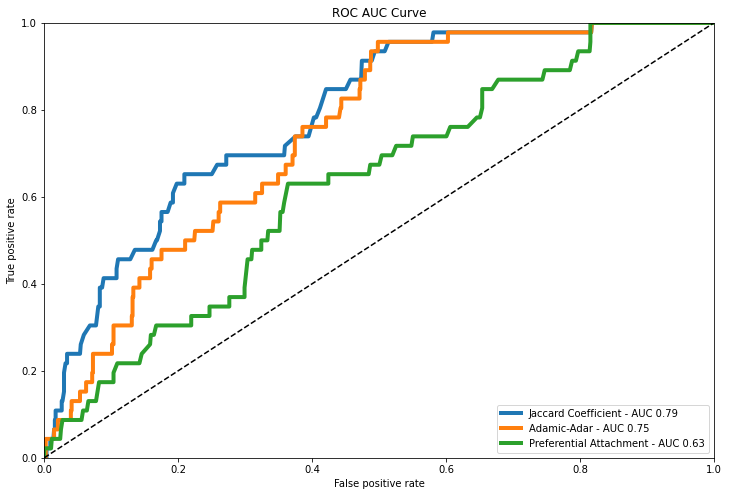

In [50]:
plt.figure(figsize=(12, 8))
plt.plot(fpr_jaccard, tpr_jaccard, label='Jaccard Coefficient - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
plt.plot(fpr_pref, tpr_pref, label='Preferential Attachment - AUC %.2f' % auc_pref, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC AUC Curve")
plt.legend(loc='lower right')
plt.show()

In [51]:
def TruePositive(first,second):
    #true addition
    tp = 0
    return tp
            
                
def TrueNegative(first,second):
    #True removal
    tn = 0;
    return tn


def All(first,second):
    # All additon and removal
    addition = 0;
    removel = 0;
    #get all the removal which are in first but not in second
    for item in first:
        if item not in second:
            removal+=1;
    #get all the addition which are in second but not in first
    for item in second:
        if item not in first:
            addition+=1;
    return addition+removal
    

In [52]:
a = np.array([1,2])

In [53]:
b = a.copy()

In [54]:
b

array([1, 2])

In [55]:
b[0] = 3

In [56]:
a

array([1, 2])

In [57]:
b

array([3, 2])

In [33]:
a = [(1,2),(1,3)]

In [35]:
(1,2) not in a

False

In [57]:
import networkx as nx 
  
G = nx.Graph() 
G.add_edges_from([(1, 2), (1, 3), (1, 4), (3, 4), (4, 5)]) 
  
print(list(nx.adamic_adar_index(G,ebunch=[(1,4)]))[0][2]) 

1.4426950408889634
